# The puropse of this Notebook is to implement the Stochastic Gradient Descent in FASTAI 


In [24]:
from fastai.basics import *
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Let's start by creating a Linear Regression line 
 

In [0]:
n = 100 

## Create a ones tensor to hold values and then ascribe values to it radomly between -1 and 1

In [15]:
x = torch.ones(n,2)

x.shape
type(x)

torch.Tensor

In [16]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.6585,  1.0000],
        [-0.1629,  1.0000],
        [-0.2632,  1.0000],
        [-0.8760,  1.0000],
        [-0.8874,  1.0000]])

In [18]:
a = tensor(3.,2)
a

tensor([3., 2.])

## Do y= ab + c 

In [0]:
y = x@a  + torch.rand(n)

In [21]:
print('X shape: ', x.shape)
print('Y shape: ', y.shape)


X shape:  torch.Size([100, 2])
Y shape:  torch.Size([100])


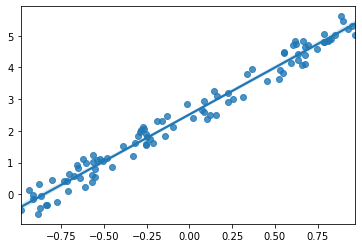

In [25]:
# plt.scatter(x[:,0],y)
sns.regplot(x[:,0],y)

The above line is fitting data we generated, then uniformly split between -1 and 1.

Our goal is to reduce the distance between the line generated by x@a and the actual values of the points. This will be done by establishing a loss function which will update the values of the value in a and lead to a better fit line


The loss function that we will use to measure how well our model is doing so far is mean-squared error. In this loss function you take the difference between the predicted value vs actual value, square the difference, and take the mean of that squared value

In [0]:
def mse(y_hat, y):
  return ((y_hat-y)**2).mean()

In [28]:
a = tensor(-1.,1)
a

tensor([-1.,  1.])

In [0]:
y_hat = x@a 

In [30]:
mse(y_hat,y)

tensor(7.4716)

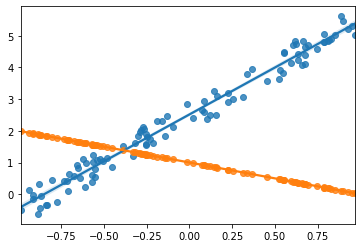

In [31]:
sns.regplot(x[:,0],y)
sns.regplot(x[:,0],y_hat)

Now, onto minimizing the difference between predicted and actual values. To do this, we will use the **Gradient Descent**. The gradient descent takes the derivate of the loss function with respect to weight parameters and then propagates the change required to be made to the parmaters back through the layers. Then we repeat this process all over again 

In [33]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def grad_update():
  #create prediction 
  y_hat = x@a
  loss = mse(y,y_hat)
  if t%10 == 0 :
      print(loss)
  # propagate loss back 
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()  


In [46]:
lr = 1e-1


for t in range(200):
  grad_update()

tensor(0.4191, grad_fn=<MeanBackward0>)
tensor(0.1574, grad_fn=<MeanBackward0>)
tensor(0.0967, grad_fn=<MeanBackward0>)
tensor(0.0826, grad_fn=<MeanBackward0>)
tensor(0.0793, grad_fn=<MeanBackward0>)
tensor(0.0786, grad_fn=<MeanBackward0>)
tensor(0.0784, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)


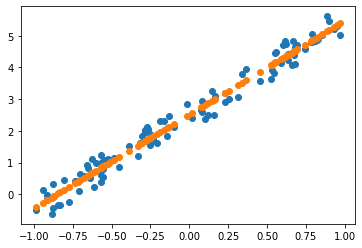

In [47]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

### After about 200 iterations of the gradient descent update the predicted values are maching up with the actual values. Let's animate it now

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')


In [52]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    grad_update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)